C:\Users\Matthew\AppData\Local\Temp\ipykernel_18784\632424146.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clinical_data[binary_columns] = clinical_data[binary_columns].replace(binary_map)


Feature Importances:
Baseline VA                                        0.348275
Baseline Previous Anti-VEGF Injections (NUMBER)    0.107062
Baseline Intraocular Pressure (mmHg)               0.098346
DM duration (years)                                0.097752
HBA1C                                              0.077184
Heart Disease (YES/NO)                             0.066900
Age                                                0.054886
DM Treatment (Tab, Ins, Tab and Ins)               0.045308
Baseline Central Subfield Thickness (µm)           0.039388
Gender                                             0.017949
Baseline Previous Laser (YES/NO)                   0.015280
Kidney Disease (YES/NO)                            0.009905
Baseline Previous Ozurdex (NUMBER)                 0.007081
Baseline Previous VITY (YES/NO)                    0.003822
Stroke (YES/NO)                                    0.003260
Baseline Nonresponder Ozurdex (YES/NO)             0.002845
DM type            

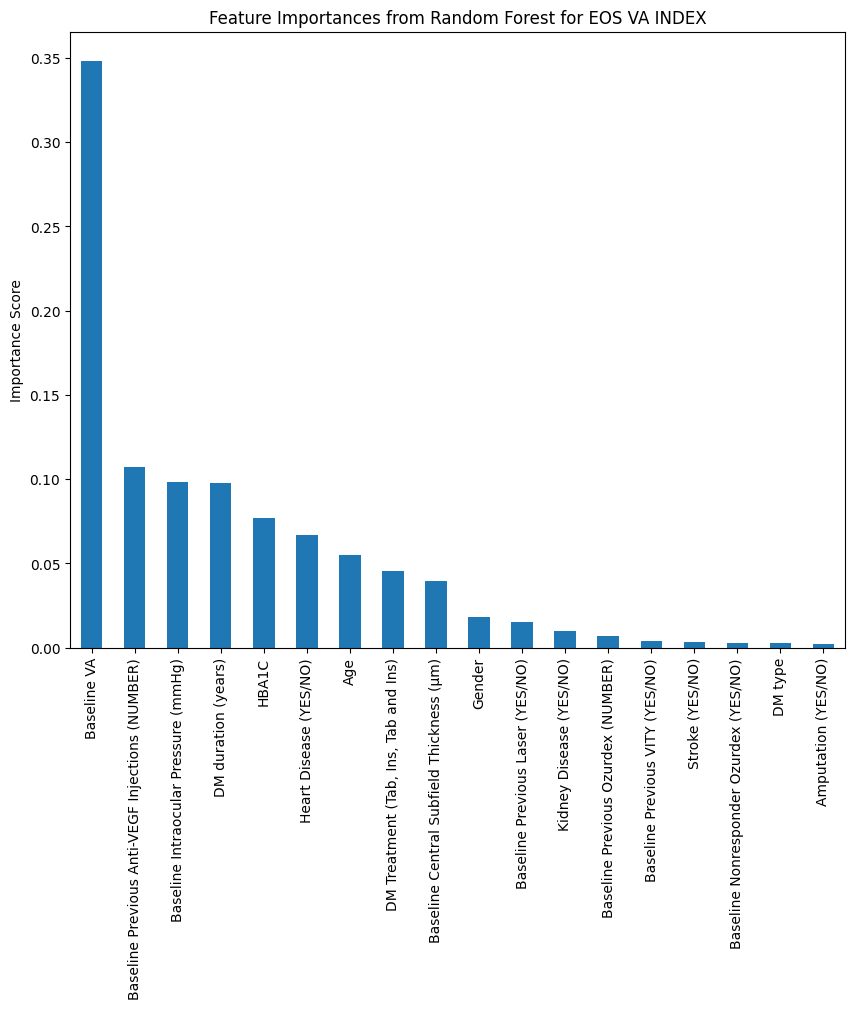

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load clinical data
clinical_data_path = r'E:\ROCHE_OCT_SSD\INDEX_Clinical_data.xlsx'
clinical_data = pd.read_excel(clinical_data_path)

# Selected clinical columns
clinical_columns = [
    'DM duration (years)', 'Baseline VA',
    'Baseline Central Subfield Thickness (µm)', 'Baseline Intraocular Pressure (mmHg)', 'Baseline Nonresponder Ozurdex (YES/NO)', 'Baseline Previous VITY (YES/NO)', 
    'Baseline Previous Laser (YES/NO)', 'Baseline Previous Ozurdex (NUMBER)', 'Baseline Previous Anti-VEGF Injections (NUMBER)',
    'Age', 'Gender', 'DM type', 'DM Treatment (Tab, Ins, Tab and Ins)', 'HBA1C', 'Kidney Disease (YES/NO)', 'Amputation (YES/NO)', 'Stroke (YES/NO)', 'Heart Disease (YES/NO)'
]

# Convert categorical data to numerical
treatment_map = {'Tablets': 0, 'Insulin': 1, 'Tablets and Insulin': 2}
clinical_data['DM Treatment (Tab, Ins, Tab and Ins)'] = clinical_data['DM Treatment (Tab, Ins, Tab and Ins)'].map(treatment_map)

dm_type_map = {'type 1': 1, 'type 2': 2}
clinical_data['DM type'] = clinical_data['DM type'].map(dm_type_map)

gender_map = {'male': 0, 'female': 1}
clinical_data['Gender'] = clinical_data['Gender'].map(gender_map)

binary_map = {'yes': 1, 'no': 0}
binary_columns = ['Kidney Disease (YES/NO)', 'Amputation (YES/NO)', 'Stroke (YES/NO)', 'Heart Disease (YES/NO)', 'Baseline Previous Laser (YES/NO)', 'Baseline Previous VITY (YES/NO)', 'Baseline Nonresponder Ozurdex (YES/NO)']
clinical_data[binary_columns] = clinical_data[binary_columns].replace(binary_map)

# Define target variable
y = clinical_data['Month 12 VA']

# Define feature set
X_features = clinical_data[clinical_columns].dropna()

# Train a Random Forest model to get feature importances
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_features, y.loc[X_features.index])

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=clinical_columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Display feature importances
print("Feature Importances:")
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importances from Random Forest for EOS VA INDEX')
plt.ylabel('Importance Score')
plt.show()


Feature Importances:
Baseline VA                                 0.307826
DM duration (years)                         0.237886
Age                                         0.169364
Baseline Macular Volume (mm^3)              0.089709
Baseline Central Subfield Thickness (µm)    0.085735
IRF Cysts                                   0.028274
Deep Heam Within Macula                     0.023718
SRF Fluid                                   0.021512
Exudates Within Macula                      0.021363
Gender                                      0.012047
DM type                                     0.002564
dtype: float64


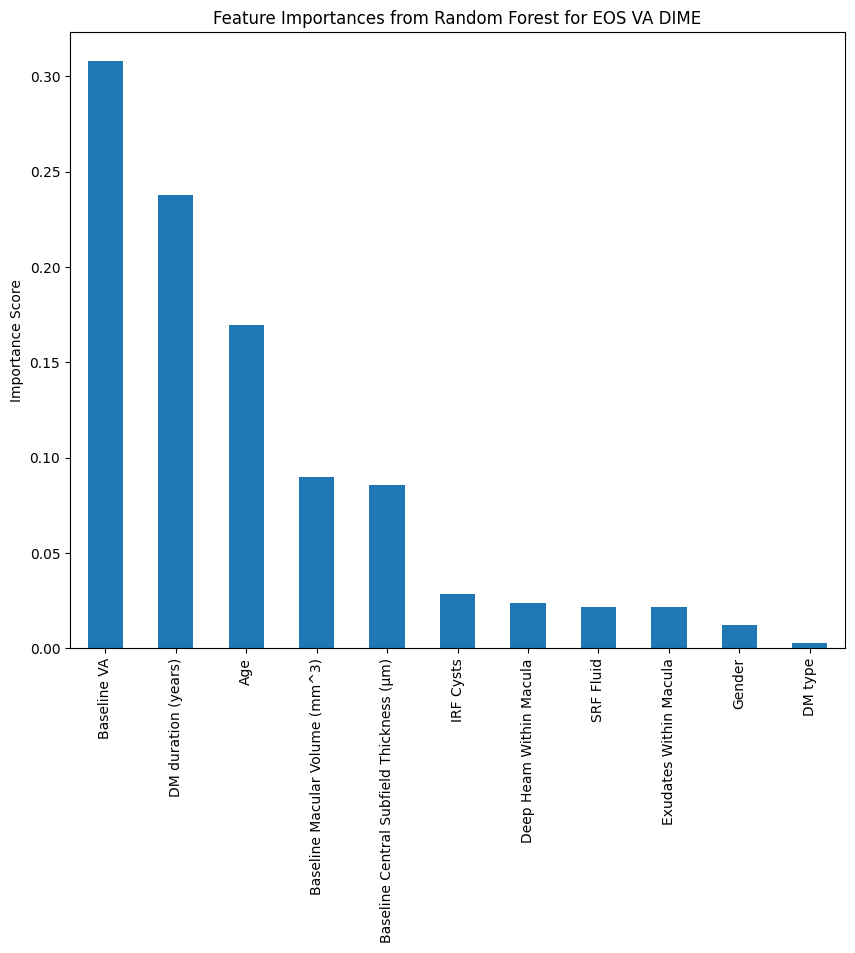

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load clinical data
# Load clinical data
clinical_data_path = r'E:\ROCHE_OCT_SSD\DIME_Clinical_data.xlsx'
clinical_data = pd.read_excel(clinical_data_path)
clinical_data = clinical_data[clinical_data['study number'] != 'SEI-039']
clinical_data = clinical_data[clinical_data['study number'] != 'SEI-038']

# Selected clinical columns
clinical_columns = [
    'Age', 'Gender', 'DM type', 'DM duration (years)', 'Baseline VA',
    'Baseline Central Subfield Thickness (µm)', 'Baseline Macular Volume (mm^3)',
    'Exudates Within Macula', 'Deep Heam Within Macula', 'IRF Cysts', 'SRF Fluid'
]

# Convert categorical data to numerical
clinical_data['Gender'] = clinical_data['Gender'].map({'male': 0, 'female': 1})
clinical_data['DM type'] = clinical_data['DM type'].map({1: 0, 2: 1})
severity_map = {'mild': 1, 'mod': 2, 'severe': 3}  # Example mapping for severity levels
clinical_data['Exudates Within Macula'] = clinical_data['Exudates Within Macula'].map(severity_map)
clinical_data['Deep Heam Within Macula'] = clinical_data['Deep Heam Within Macula'].map(severity_map)
clinical_data['IRF Cysts'] = clinical_data['IRF Cysts'].map(severity_map)
clinical_data['SRF Fluid'] = clinical_data['SRF Fluid'].map(severity_map)

# Define target variable
y = clinical_data['EOS VA']

# Define feature set
X_features = clinical_data[clinical_columns].dropna()

# Train a Random Forest model to get feature importances
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_features, y.loc[X_features.index])

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=clinical_columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Display feature importances
print("Feature Importances:")
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importances from Random Forest for EOS VA DIME')
plt.ylabel('Importance Score')
plt.show()


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load clinical data
clinical_data_path = r'E:\ROCHE_OCT_SSD\INDEX_Clinical_data.xlsx'
clinical_data = pd.read_excel(clinical_data_path)
clinical_data = clinical_data.rename(columns={'Month 12 VA': 'EOS VA'})
# Selected clinical columns
clinical_columns = [
    'Age',                                                    # [0] - matched with datasetA
    'Gender',                                                 # [1] - matched with datasetA
    'DM type',                                               # [2] - matched with datasetA
    'DM duration (years)',                                   # [3] - matched with datasetA
    'Baseline VA',                                           # [4] - matched with datasetA
    'Baseline Central Subfield Thickness (µm)',              # [5] - matched with datasetA
    'Baseline Intraocular Pressure (mmHg)',                  # [6] - unique to datasetB
    'Baseline Nonresponder Ozurdex (YES/NO)',               # [7] - unique to datasetB
    'Baseline Previous VITY (YES/NO)',                      # [8] - unique to datasetB
    'Baseline Previous Laser (YES/NO)',                     # [9] - unique to datasetB
    'Baseline Previous Ozurdex (NUMBER)',                   # [10] - unique to datasetB
    'Baseline Previous Anti-VEGF Injections (NUMBER)',      # [11] - unique to datasetB
    'DM Treatment (Tab, Ins, Tab and Ins)',                # [12] - unique to datasetB
    'HBA1C',                                               # [13] - unique to datasetB
    'Kidney Disease (YES/NO)',                             # [14] - unique to datasetB
    'Amputation (YES/NO)',                                 # [15] - unique to datasetB
    'Stroke (YES/NO)',                                     # [16] - unique to datasetB
    'Heart Disease (YES/NO)'                               # [17] - unique to datasetB
]

# Convert categorical data to numerical
treatment_map = {'Tablets': 0, 'Insulin': 1, 'Tablets and Insulin': 2}
clinical_data['DM Treatment (Tab, Ins, Tab and Ins)'] = clinical_data['DM Treatment (Tab, Ins, Tab and Ins)'].map(treatment_map)

dm_type_map = {'type 1': 1, 'type 2': 2}
clinical_data['DM type'] = clinical_data['DM type'].map(dm_type_map)

gender_map = {'male': 0, 'female': 1}
clinical_data['Gender'] = clinical_data['Gender'].map(gender_map)

binary_map = {'yes': 1, 'no': 0}
binary_columns = ['Kidney Disease (YES/NO)', 'Amputation (YES/NO)', 'Stroke (YES/NO)', 'Heart Disease (YES/NO)', 'Baseline Previous Laser (YES/NO)', 'Baseline Previous VITY (YES/NO)', 'Baseline Nonresponder Ozurdex (YES/NO)']
clinical_data[binary_columns] = clinical_data[binary_columns].replace(binary_map)

# Define target variable
y = clinical_data['EOS VA']

C:\Users\Matthew\AppData\Local\Temp\ipykernel_9504\1957301586.py:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clinical_data[binary_columns] = clinical_data[binary_columns].replace(binary_map)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate and save separate correlation heatmaps for 'month 6 VA' and 'month 12 VA'
# Generate and save separate correlation heatmaps for 'month 6 VA' and 'month 12 VA'
for target in ['EOS VA']:
    # Add target to clinical columns temporarily to calculate correlations
    columns_to_include = clinical_columns + [target]
    correlation_matrix = clinical_data[columns_to_include].corr()
    
    # Plot settings for larger text and clearer labels
    plt.figure(figsize=(18, 15))  # Larger figure for better visibility
    sns.heatmap(
        correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation'},
        vmin=-1, vmax=1, annot_kws={'size': 12}  # Set annotation font size
    )

    plt.xticks(rotation=45, ha='right', fontsize=12)  # Larger x-axis labels
    plt.yticks(rotation=0, fontsize=12)  # Larger y-axis labels
    plt.tight_layout()  # Adjust layout to prevent text cutoff
    
    # Save each matrix as a separate PDF file
    filename = f'E:/ROCHE_OCT_SSD/Paper_figures/correlation_matrix_{target.replace(" ", "_")}.pdf'
    plt.savefig(filename, format='pdf')
    plt.close()

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set general font size for labels and annotations
sns.set_context("talk")  # "talk" sets a larger font size suitable for presentations or larger print

# Generate and save separate correlation heatmaps for 'month 6 VA' and 'month 12 VA'
for target in ['Month 6 VA', 'Month 12 VA']:
    # Add target to clinical columns temporarily to calculate correlations
    columns_to_include = clinical_columns + [target]
    correlation_matrix = clinical_data[columns_to_include].corr()
    
    # Plot settings for larger text and clearer labels
    plt.figure(figsize=(18, 15))  # Larger figure for better visibility
    sns.heatmap(
        correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation'},
        vmin=-1, vmax=1, annot_kws={'size': 12}  # Set annotation font size
    )
    plt.title(f'Correlation Matrix for Clinical Features and {target} (Dataset B)', fontsize=18)  # Larger title font
    plt.xticks(rotation=45, ha='right', fontsize=12)  # Larger x-axis labels
    plt.yticks(rotation=0, fontsize=12)  # Larger y-axis labels
    plt.tight_layout()  # Adjust layout to prevent text cutoff
    
    # Save each matrix as a separate PDF file
    filename = f'E:/ROCHE_OCT_SSD/Paper_figures/correlation_matrix_{target.replace(" ", "_")}.pdf'
    plt.savefig(filename, format='pdf')
    plt.close()



In [14]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the clinical data
clinical_data_path = r'E:\ROCHE_OCT_SSD\INDEX_Clinical_data.xlsx'
clinical_data = pd.read_excel(clinical_data_path)

# Selected clinical columns
clinical_columns = [
    'DM duration (years)', 'Baseline VA',
    'Baseline Central Subfield Thickness', 'Baseline Intraocular Pressure', 'Baseline Nonresponder Ozurdex (YES/NO)', 'Baseline Previous VITY (YES/NO)', 
    'Baseline Previous Laser (YES/NO)', 'Baseline Previous Ozurdex (NUMBER)', 'Baseline Previous Anti-VEGF Injections (NUMBER)',
    'Age', 'Gender', 'DM type', 'DM Treatment (Tab, Ins, Tab and Ins)', 'HBA1C', 'Kidney Disease (YES/NO)', 'Amputation (YES/NO)', 'Stroke (YES/NO)', 'Heart Disease (YES/NO)', 'Month 12 VA'
]

# Convert categorical data to numerical
treatment_map = {'Tablets': 0, 'Insulin': 1, 'Tablets and Insulin': 2}
clinical_data['DM Treatment (Tab, Ins, Tab and Ins)'] = clinical_data['DM Treatment (Tab, Ins, Tab and Ins)'].map(treatment_map)

dm_type_map = {'type 1': 1, 'type 2': 2}
clinical_data['DM type'] = clinical_data['DM type'].map(dm_type_map)

gender_map = {'male': 0, 'female': 1}
clinical_data['Gender'] = clinical_data['Gender'].map(gender_map)

binary_map = {'yes': 1, 'no': 0}
binary_columns = ['Kidney Disease (YES/NO)', 'Amputation (YES/NO)', 'Stroke (YES/NO)', 'Heart Disease (YES/NO)', 'Baseline Previous Laser (YES/NO)', 'Baseline Previous VITY (YES/NO)', 'Baseline Nonresponder Ozurdex (YES/NO)']
clinical_data[binary_columns] = clinical_data[binary_columns].replace(binary_map)


# Prepare features and target
features = clinical_columns.copy()
features.remove('Month 12 VA')

target = 'Month 12 VA'

X = clinical_data[features]
y = clinical_data[target]

# Handle missing values (if any)
# Drop rows with missing target values
clinical_data = clinical_data.dropna(subset=[target])
X = X.loc[clinical_data.index]
y = y.loc[clinical_data.index]

# Optionally, fill missing values in features with mean or median
# X = X.fillna(X.mean())

# 1. Correlation Analysis
correlations = X.corrwith(y).abs()
top_features_corr = correlations.sort_values(ascending=False).head(len(X.columns))

print("Top 5 features according to Pearson correlation with 'month 12 VA':")
print(top_features_corr)
print("\n")

# 2. F-test (ANOVA)
selector_f = SelectKBest(score_func=f_regression, k='all')
selector_f.fit(X, y)
scores_f = pd.Series(selector_f.scores_, index=X.columns)
top_features_f = scores_f.sort_values(ascending=False).head(len(X.columns))

print("Top 5 features according to F-test ANOVA:")
print(top_features_f)
print("\n")

# 3. Mutual Information Regression
selector_mi = SelectKBest(score_func=mutual_info_regression, k='all')
selector_mi.fit(X, y)
scores_mi = pd.Series(selector_mi.scores_, index=X.columns)
top_features_mi = scores_mi.sort_values(ascending=False).head(len(X.columns))

print("Top 5 features according to Mutual Information:")
print(top_features_mi)
print("\n")

# 4. Random Forest Feature Importances
# Optional: Fill missing values or drop them as Random Forest can't handle NaNs
X_rf = X.fillna(X.mean())
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_rf, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features_rf = importances.sort_values(ascending=False).head(len(X.columns))

print("Top 5 features according to Random Forest feature importances:")
print(top_features_rf)
print("\n")

# Summary of top features from all methods
print("Summary of top features from all methods:")
top_features_summary = pd.DataFrame({
    'Correlation': top_features_corr.index,
    'F-test ANOVA': top_features_f.index,
    'Mutual Information': top_features_mi.index,
    'Random Forest': top_features_rf.index
})
print(top_features_summary)


Top 5 features according to Pearson correlation with 'month 12 VA':
Baseline VA                                        0.556170
Heart Disease (YES/NO)                             0.513098
DM duration (years)                                0.391522
Baseline Previous VITY (YES/NO)                    0.354408
Baseline Intraocular Pressure                      0.347111
Amputation (YES/NO)                                0.341003
Gender                                             0.332885
Age                                                0.327112
DM Treatment (Tab, Ins, Tab and Ins)               0.312245
Baseline Previous Anti-VEGF Injections (NUMBER)    0.273903
DM type                                            0.195718
Baseline Previous Ozurdex (NUMBER)                 0.124170
Kidney Disease (YES/NO)                            0.103693
Baseline Central Subfield Thickness                0.094340
Baseline Previous Laser (YES/NO)                   0.081990
Baseline Nonresponder Ozurdex (Y

C:\Users\Matthew\AppData\Local\Temp\ipykernel_11952\3778762623.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clinical_data[binary_columns] = clinical_data[binary_columns].replace(binary_map)


In [24]:
##### DIME DATA #####

clinical_data_path = r'E:\ROCHE_OCT_SSD\DIME_Clinical_data.xlsx'
clinical_data = pd.read_excel(clinical_data_path)
clinical_data = clinical_data[clinical_data['study number'] != 'SEI-039']
clinical_data = clinical_data[clinical_data['study number'] != 'SEI-038']

# Selected clinical columns
clinical_columns = [
    'Age', 'Gender', 'DM type', 'DM duration (years)', 'Baseline VA',
    'Baseline Central Subfield Thickness', 'Baseline Macular Volume',
    'Exudates Within Macula', 'Deep Heam Within Macula', 'IRF Cysts', 'SRF Fluid', 'EOS VA'
]

# Convert categorical data to numerical
clinical_data['Gender'] = clinical_data['Gender'].map({'male': 0, 'female': 1})
clinical_data['DM type'] = clinical_data['DM type'].map({1: 0, 2: 1})
severity_map = {'mild': 1, 'mod': 2, 'severe': 3}  # Example mapping for severity levels
clinical_data['Exudates Within Macula'] = clinical_data['Exudates Within Macula'].map(severity_map)
clinical_data['Deep Heam Within Macula'] = clinical_data['Deep Heam Within Macula'].map(severity_map)
clinical_data['IRF Cysts'] = clinical_data['IRF Cysts'].map(severity_map)
clinical_data['SRF Fluid'] = clinical_data['SRF Fluid'].map(severity_map)

# Prepare features and target
features = clinical_columns.copy()
features.remove('EOS VA')

target = 'EOS VA'

X = clinical_data[features]
y = clinical_data[target]

# Handle missing values (if any)
# Drop rows with missing target values

X = X.loc[clinical_data.index]
y = y.loc[clinical_data.index]

# Optionally, fill missing values in features with mean or median
X = X.fillna(X.mean())

# 1. Correlation Analysis
correlations = X.corrwith(y).abs()
top_features_corr = correlations.sort_values(ascending=False).head(len(X.columns))

print("Top 5 features according to Pearson correlation with 'VA EOS SE':")
print(top_features_corr)
print("\n")

# 2. F-test (ANOVA)
selector_f = SelectKBest(score_func=f_regression, k='all')
selector_f.fit(X, y)
scores_f = pd.Series(selector_f.scores_, index=X.columns)
top_features_f = scores_f.sort_values(ascending=False).head(len(X.columns))

print("Top 5 features according to F-test ANOVA:")
print(top_features_f)
print("\n")

# 3. Mutual Information Regression
selector_mi = SelectKBest(score_func=mutual_info_regression, k='all')
selector_mi.fit(X, y)
scores_mi = pd.Series(selector_mi.scores_, index=X.columns)
top_features_mi = scores_mi.sort_values(ascending=False).head(len(X.columns))

print("Top 5 features according to Mutual Information:")
print(top_features_mi)
print("\n")

# 4. Random Forest Feature Importances
# Optional: Fill missing values or drop them as Random Forest can't handle NaNs
X_rf = X.fillna(X.mean())
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_rf, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features_rf = importances.sort_values(ascending=False).head(len(X.columns))

print("Top 3 features according to Random Forest feature importances:")
print(top_features_rf)
print("\n")

# Summary of top features from all methods
print("Summary of top features from all methods:")
top_features_summary = pd.DataFrame({
    'Correlation': top_features_corr.index,
    'F-test ANOVA': top_features_f.index,
    'Mutual Information': top_features_mi.index,
    'Random Forest': top_features_rf.index
})
print(top_features_summary)

Top 5 features according to Pearson correlation with 'VA EOS SE':
Baseline VA                            0.521976
Age                                    0.357502
IRF Cysts                              0.337393
DM duration (years)                    0.265161
SRF Fluid                              0.261419
DM type                                0.181923
Gender                                 0.160401
Deep Heam Within Macula                0.152653
Exudates Within Macula                 0.130899
Baseline Macular Volume                0.070472
Baseline Central Subfield Thickness    0.062353
dtype: float64


Top 5 features according to F-test ANOVA:
Baseline VA                            11.609302
Age                                     4.542622
IRF Cysts                               3.982169
DM duration (years)                     2.344460
SRF Fluid                               2.273937
DM type                                 1.061096
Gender                                  0.818648
Deep